<a href="https://colab.research.google.com/github/jason96819/Maple-User-Sentiment-Analysis/blob/main/23.08.02/9_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

In [7]:
import matplotlib.font_manager as fm
path = './drive/MyDrive/data/malgun.ttf'
fontprop = fm.FontProperties(fname=path, size=10)

In [8]:
df = pd.read_csv('./drive/MyDrive/data/project/preprocessed_maple.csv')
df

,Date,Reaction,Length,Label,Score
0,2023-06-01 01:02,6차 아니면 로드맵 유기하면 안되는거 아니야 간담회까지 열어서 로드맵 보여주겠다고 ...,176,0,99.650
1,2023-06-01 02:08,6차 왔냐 66 66 6 6 ;;;,19,0,92.741
2,2023-06-01 02:59,근데 6차나오면 전직업 최종뎀 뻥튀기되서 보스컷 낮아지지않음? 5차때처럼 5차스킬하...,152,0,60.217
3,2023-06-01 03:34,6차 거의 확정으로보는 분위기 아녓음? 오늘은분위기가 갑자기 다들 회의적이네 냉정해졌어,48,0,68.620
4,2023-06-01 04:16,내 닉네임 검색하다가 레전드 글발견함ㅋㅋ https://m.inven.co.kr/b...,127,1,83.405
...,...,...,...,...,...
13326,2023-06-30 23:19,오늘 지하철 보니까 버츄얼 유튜버 생일도 챙기고 그러던데 우리도 6차 잘나오면 지하...,60,1,96.456
13327,2023-06-30 23:26,●▅▇█▇▆▅▄▇ 아 6차 배달 잘 오고 있나?,26,1,69.761
13328,2023-06-30 23:47,진짜 메이플 빼고 옆동네는 다 난리났네… 로아는 안그래도 망해가는데 중국몽 같이해버...,141,0,89.979
13329,2023-06-30 23:57,진짜 심각) 미하일 주력기 문의 한번만 더 봐주세요 재업 추하지만 저번에 올렸던 글...,134,1,63.413


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
grouped = df.groupby('Day').count()
grouped = grouped['Reaction']
grouped = pd.DataFrame(grouped)
grouped.describe()

,Reaction
count,30.000000
mean,444.366667
std,501.536156
min,44.000000
25%,163.750000
50%,256.000000
75%,443.000000
max,1986.000000


# 전처리 데이터 활용

##  첫번째 분석

전체 긍정/부정 개수

In [10]:
df['Label'].value_counts()

0    7097
1    6234
Name: Label, dtype: int64

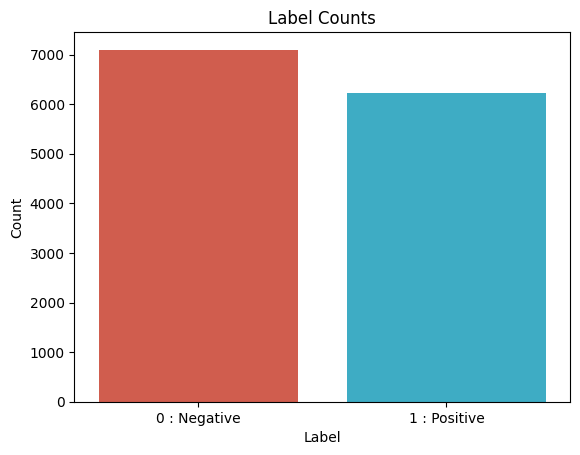

In [11]:
# 'Label' 열의 값 카운트
label_counts = df['Label'].value_counts()

# 막대 그래프로 시각화
sns.barplot(x=label_counts.index, y=label_counts.values, palette={0: '#E64D38', 1: '#27BADB'})
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')
plt.xticks(ticks=[0, 1], labels=['0 : Negative', '1 : Positive'])
plt.show()

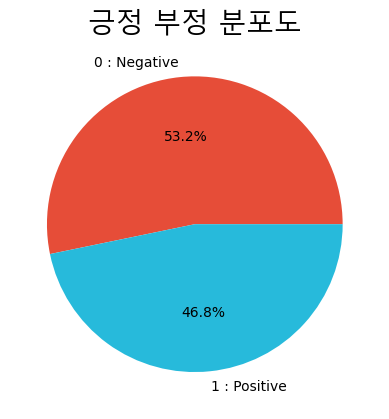

In [12]:
# 'Label' 열의 값 카운트
label_counts = df['Label'].value_counts()

# 파이 그래프로 시각화
plt.pie(label_counts, labels=['0 : Negative', '1 : Positive'], colors=['#E64D38', '#27BADB'], autopct='%1.1f%%')
plt.title('긍정 부정 분포도', fontproperties=fontprop, size=20)
plt.show()

## 두번째 분석

시간별 긍정 / 부정 count

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13331 entries, 0 to 13330
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      13331 non-null  datetime64[ns]
 1   Reaction  13331 non-null  object        
 2   Length    13331 non-null  int64         
 3   Label     13331 non-null  int64         
 4   Score     13331 non-null  float64       
 5   Day       13331 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 625.0+ KB


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13331 entries, 0 to 13330
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      13331 non-null  datetime64[ns]
 1   Reaction  13331 non-null  object        
 2   Length    13331 non-null  int64         
 3   Label     13331 non-null  int64         
 4   Score     13331 non-null  float64       
 5   Day       13331 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 625.0+ KB


In [15]:
df

,Date,Reaction,Length,Label,Score,Day
0,2023-06-01 01:02:00,6차 아니면 로드맵 유기하면 안되는거 아니야 간담회까지 열어서 로드맵 보여주겠다고 ...,176,0,99.650,1
1,2023-06-01 02:08:00,6차 왔냐 66 66 6 6 ;;;,19,0,92.741,1
2,2023-06-01 02:59:00,근데 6차나오면 전직업 최종뎀 뻥튀기되서 보스컷 낮아지지않음? 5차때처럼 5차스킬하...,152,0,60.217,1
3,2023-06-01 03:34:00,6차 거의 확정으로보는 분위기 아녓음? 오늘은분위기가 갑자기 다들 회의적이네 냉정해졌어,48,0,68.620,1
4,2023-06-01 04:16:00,내 닉네임 검색하다가 레전드 글발견함ㅋㅋ https://m.inven.co.kr/b...,127,1,83.405,1
...,...,...,...,...,...,...
13326,2023-06-30 23:19:00,오늘 지하철 보니까 버츄얼 유튜버 생일도 챙기고 그러던데 우리도 6차 잘나오면 지하...,60,1,96.456,30
13327,2023-06-30 23:26:00,●▅▇█▇▆▅▄▇ 아 6차 배달 잘 오고 있나?,26,1,69.761,30
13328,2023-06-30 23:47:00,진짜 메이플 빼고 옆동네는 다 난리났네… 로아는 안그래도 망해가는데 중국몽 같이해버...,141,0,89.979,30
13329,2023-06-30 23:57:00,진짜 심각) 미하일 주력기 문의 한번만 더 봐주세요 재업 추하지만 저번에 올렸던 글...,134,1,63.413,30


### 하루 단위

In [16]:
day = df[['Date', 'Label']]
day['Day'] = day['Date'].dt.day
day

,Date,Label,Day
0,2023-06-01 01:02:00,0,1
1,2023-06-01 02:08:00,0,1
2,2023-06-01 02:59:00,0,1
3,2023-06-01 03:34:00,0,1
4,2023-06-01 04:16:00,1,1
...,...,...,...
13326,2023-06-30 23:19:00,1,30
13327,2023-06-30 23:26:00,1,30
13328,2023-06-30 23:47:00,0,30
13329,2023-06-30 23:57:00,1,30


In [17]:
grouped_day = day.groupby(['Day', 'Label']).size().unstack(fill_value=0)
grouped_day

Label,0,1
Day,,
1,185,151
2,136,125
3,16,28
4,28,23
5,72,61
6,62,40
7,118,104
8,74,98
9,124,141


In [18]:
grouped_day[0].sum() + grouped_day[1].sum()

13331

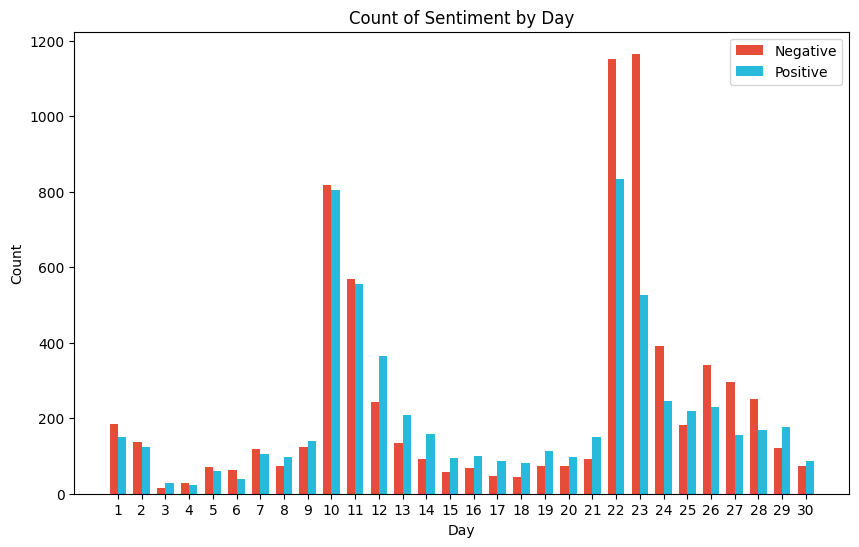

In [19]:
# 막대그래프 그리기
x = np.arange(len(grouped_day))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, grouped_day[0], width, label='Negative', color='#E64D38')
rects2 = ax.bar(x + width/2, grouped_day[1], width, label='Positive', color='#27BADB')

# x축에 Day 값 설정
ax.set_xticks(x)
ax.set_xticklabels(grouped_day.index)

# 그래프에 레이블 추가
ax.set_xlabel('Day')
ax.set_ylabel('Count')
ax.set_title('Count of Sentiment by Day')
ax.legend()

# 그래프 출력
plt.show()

- 6/10 : 메이플 쇼케이스에 6차 등장
- 6/22 : 메이플 테스트 서버에 6차 등장

### 6시간 단위

In [20]:
# 'Label' 컬럼을 문자열로 변환 (count를 위해)
df['Label'] = df['Label'].astype(str)

# 'Date'를 인덱스로 설정하고 6시간 단위로 resample하여 'Label'을 count
resampled_df = df.set_index('Date').resample('6H')['Label'].apply(lambda x: x.value_counts())
dfdf = pd.DataFrame(resampled_df)
dfdf = dfdf.reset_index()
dfdf

,Date,level_1,Label
0,2023-06-01 00:00:00,0,10
1,2023-06-01 00:00:00,1,1
2,2023-06-01 06:00:00,1,21
3,2023-06-01 06:00:00,0,20
4,2023-06-01 12:00:00,1,48
...,...,...,...
235,2023-06-30 06:00:00,0,17
236,2023-06-30 12:00:00,1,37
237,2023-06-30 12:00:00,0,35
238,2023-06-30 18:00:00,1,21


In [21]:
grouped_6h = dfdf.pivot(index='Date', columns='level_1', values='Label')
grouped_6h

level_1,0,1
Date,,
2023-06-01 00:00:00,10,1
2023-06-01 06:00:00,20,21
2023-06-01 12:00:00,47,48
2023-06-01 18:00:00,108,81
2023-06-02 00:00:00,7,8
...,...,...
2023-06-29 18:00:00,33,48
2023-06-30 00:00:00,11,9
2023-06-30 06:00:00,17,21


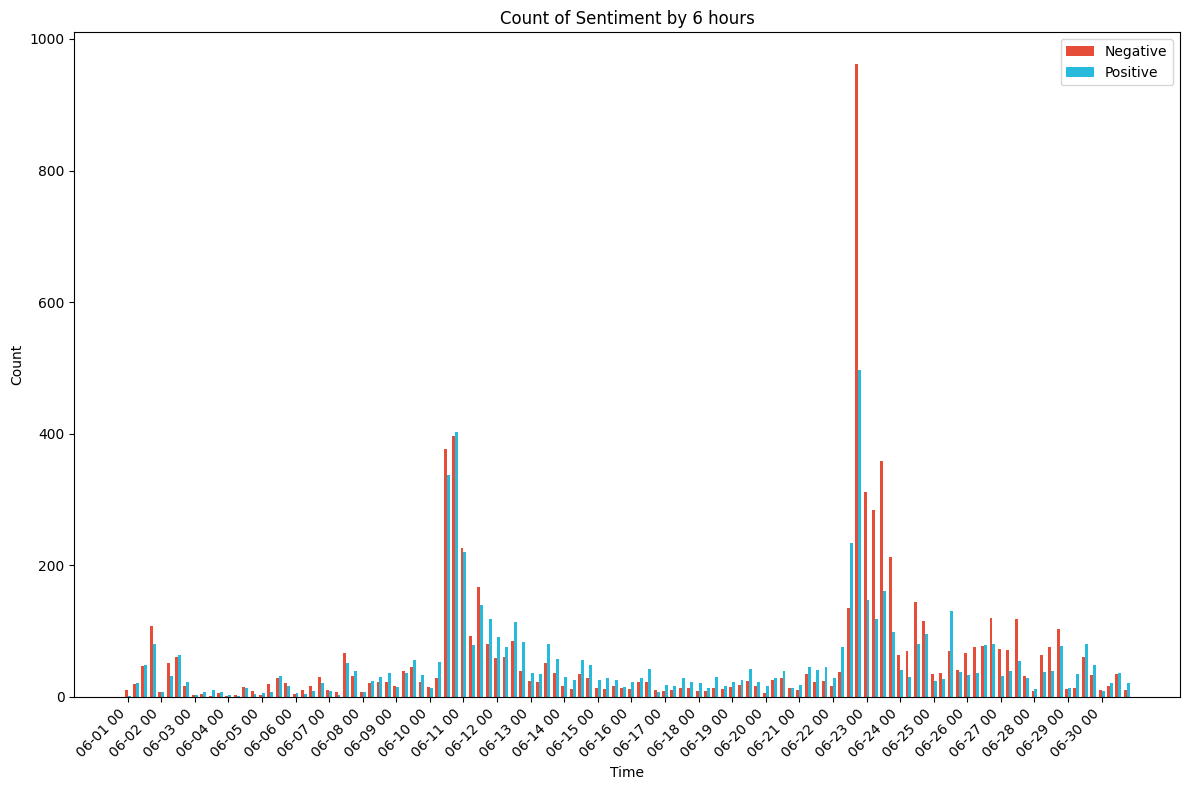

In [22]:
# 막대그래프 그리기
x = np.arange(len(grouped_6h))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, grouped_6h['0'], width, label='Negative', color='#E64D38')
rects2 = ax.bar(x + width/2, grouped_6h['1'], width, label='Positive', color='#27BADB')

# x축에 6시간 단위로 샘플링한 인덱스 값 설정
ax.set_xticks(x)
ax.set_xticklabels(grouped_6h.index.strftime('%m-%d %H'), rotation=45, ha='right')

# x축 눈금 개수 설정 (데이터의 절반 개수로 설정)
plt.locator_params(axis='x', nbins=len(x)/4)

# 그래프에 레이블 추가
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('Count of Sentiment by 6 hours')
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

### 1시간 단위

In [23]:
# 'Label' 컬럼을 문자열로 변환 (count를 위해)
df['Label'] = df['Label'].astype(str)

# 'Date'를 인덱스로 설정하고 6시간 단위로 resample하여 'Label'을 count
resampled_df = df.set_index('Date').resample('H')['Label'].apply(lambda x: x.value_counts())
dfdf1 = pd.DataFrame(resampled_df)
dfdf1 = dfdf1.reset_index()
dfdf1

,Date,level_1,Label
0,2023-06-01 01:00:00,0,1
1,2023-06-01 02:00:00,0,2
2,2023-06-01 03:00:00,0,1
3,2023-06-01 04:00:00,0,3
4,2023-06-01 04:00:00,1,1
...,...,...,...
1289,2023-06-30 21:00:00,0,1
1290,2023-06-30 22:00:00,1,7
1291,2023-06-30 22:00:00,0,3
1292,2023-06-30 23:00:00,1,5


In [24]:
grouped_1h = dfdf1.pivot(index='Date', columns='level_1', values='Label')
grouped_1h

level_1,0,1
Date,,
2023-06-01 01:00:00,1.0,NaN
2023-06-01 02:00:00,2.0,NaN
2023-06-01 03:00:00,1.0,NaN
2023-06-01 04:00:00,3.0,1.0
2023-06-01 05:00:00,3.0,NaN
...,...,...
2023-06-30 19:00:00,2.0,1.0
2023-06-30 20:00:00,1.0,1.0
2023-06-30 21:00:00,1.0,2.0


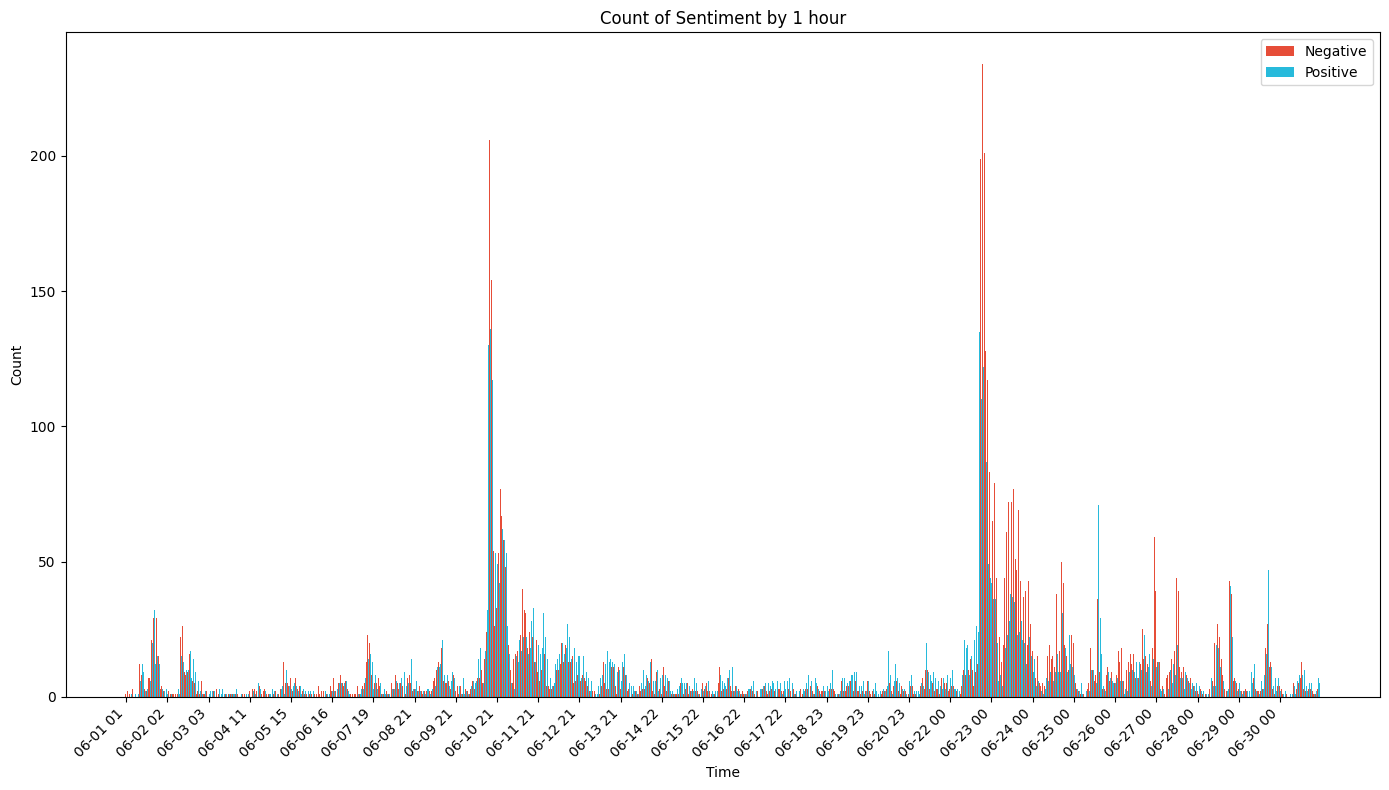

In [25]:
# 막대그래프 그리기
x = np.arange(len(grouped_1h))
width = 0.5
fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, grouped_1h['0'], width, label='Negative', color='#E64D38')
rects2 = ax.bar(x + width/2, grouped_1h['1'], width, label='Positive', color='#27BADB')

# x축에 6시간 단위로 샘플링한 인덱스 값 설정
ax.set_xticks(x)
ax.set_xticklabels(grouped_1h.index.strftime('%m-%d %H'), rotation=45, ha='right')

# x축 눈금 개수 설정 (데이터의 절반 개수로 설정)
plt.locator_params(axis='x', nbins=len(x)/24)

# 그래프에 레이블 추가
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('Count of Sentiment by 1 hour')
ax.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

## 세번째 분석

In [26]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 33.1 MB/s eta 0:00:00


In [27]:
from konlpy.tag import Okt
okt = Okt()

### 긍정에서의 최빈 단어 top50

In [28]:
pos = df[df['Label'] == '1'].reset_index(drop=True)
pos

,Date,Reaction,Length,Label,Score,Day
0,2023-06-01 04:16:00,내 닉네임 검색하다가 레전드 글발견함ㅋㅋ https://m.inven.co.kr/b...,127,1,83.405,1
1,2023-06-01 07:57:00,6차때 티어떡상할만한 직업분명 있겠지? 듀블도 4차까지 개쓰레기였다가 블토카퓨로씹떡...,65,1,81.150,1
2,2023-06-01 08:32:00,6차전직말고 6중나생문들고오면반응궁금해미리해줘요,26,1,96.819,1
3,2023-06-01 09:45:00,벌써 유월이네 6월? 완전 6차,17,1,94.582,1
4,2023-06-01 10:14:00,죽음을 맞이하는 5단계 부정 : 뭐? 리부트가?.. 에이 설마분노 : 왜 하필이면 ...,156,1,70.671,1
...,...,...,...,...,...,...
6229,2023-06-30 23:10:00,이제 6차 존나 잘나오면 게임 끝인듯 이대로만 갑시다!,30,1,98.418,30
6230,2023-06-30 23:19:00,오늘 지하철 보니까 버츄얼 유튜버 생일도 챙기고 그러던데 우리도 6차 잘나오면 지하...,60,1,96.456,30
6231,2023-06-30 23:26:00,●▅▇█▇▆▅▄▇ 아 6차 배달 잘 오고 있나?,26,1,69.761,30
6232,2023-06-30 23:57:00,진짜 심각) 미하일 주력기 문의 한번만 더 봐주세요 재업 추하지만 저번에 올렸던 글...,134,1,63.413,30


In [29]:
# 한글과 공백을 제외하고 모두 제거
pos['Reaction'] = pos['Reaction'].str.replace("[^0-9 가-힣]","")
pos['Reaction'].replace('', np.nan, inplace=True)
print(pos.isnull().sum())

Date        0
Reaction    0
Length      0
Label       0
Score       0
Day         0
dtype: int64


반복하면서 stopwords 업데이트

In [30]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면', '6', '차', '로', '으로', '안', '5', '에서', '기', '2', '때', '것',
                     '개', '것', '1', '하고', '이번', '진짜', '나', '까지', '더', '적', '지금', '4', '인데', '좀', '근데', '잘', '3', '수', '아', '딜', '차는', '거', '나오면', '그', '중', '정도', '할', '뭐', '차가', '하는', '내', '못', '너무', '이제', '하면',
                     '드', '같은데', '추가', '함', '랑', '전', '본', '해서', '같음', '주', '리', '저', '하나', '어', '일', '섭', '그냥', '극', '신', '서', '많이', '상', '요', '부터', '님', '라', '보면', '됨', '같은', '있음', '이랑', '제', '난', '니까', '어떻게',
                     '있는', '처럼', '다른', '형', '기존', '성', "키", '애', '보다', '차로', '존나', '이렇게', '또', '이라', '왜', '시', '대', '오늘', '한번', '명', '말', '라고', '때문', '일단', '차도', '바로', '같이', '생각', '리마']

In [31]:
pos['Reaction'] = pos['Reaction'].apply(okt.normalize)
pos['Reaction'] = pos['Reaction'].apply(okt.morphs)
pos['Reaction'] = pos['Reaction'].apply(lambda x: [item for item in x if item not in stopwords])

In [32]:
pos_words = []

for word in pos['Reaction']:
    pos_words.extend(word)
pos_words[:10]

['닉네임', '검색', '하다가', '레전드', '글', '발견', '2299307320', '6년', '전게시글', '댓글']

In [33]:
from collections import Counter

nouns_counter = Counter(pos_words)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'스킬': 1589,
 '직업': 1135,
 '메이플': 607,
 '전직': 529,
 '강화': 506,
 '보스': 490,
 '개선': 426,
 '테섭': 384,
 '강원': 358,
 '바인': 355,
 '260': 326,
 '코어': 314,
 '하버': 304,
 '이펙트': 302,
 '사람': 301,
 '마스터': 293,
 '사냥': 285,
 '유저': 273,
 '원기': 262,
 '패치': 258,
 '시간': 255,
 '해방': 234,
 '보고': 233,
 '버닝': 231,
 '컷신': 226,
 '스펙': 225,
 '하이퍼': 225,
 '신규': 222,
 '극딜': 219,
 '비숍': 217,
 '쿨': 216,
 '쇼케': 210,
 '영상': 210,
 '리부트': 207,
 '제로': 199,
 '레벨': 198,
 '다시': 195,
 '시작': 187,
 '소마': 186,
 '캐릭': 185,
 '파티': 178,
 '느낌': 176,
 '아크': 175,
 '본캐': 174,
 '추천': 170,
 '나로': 170,
 '쇼케이스': 166,
 '아델': 161,
 '마다': 160,
 '몇': 159}

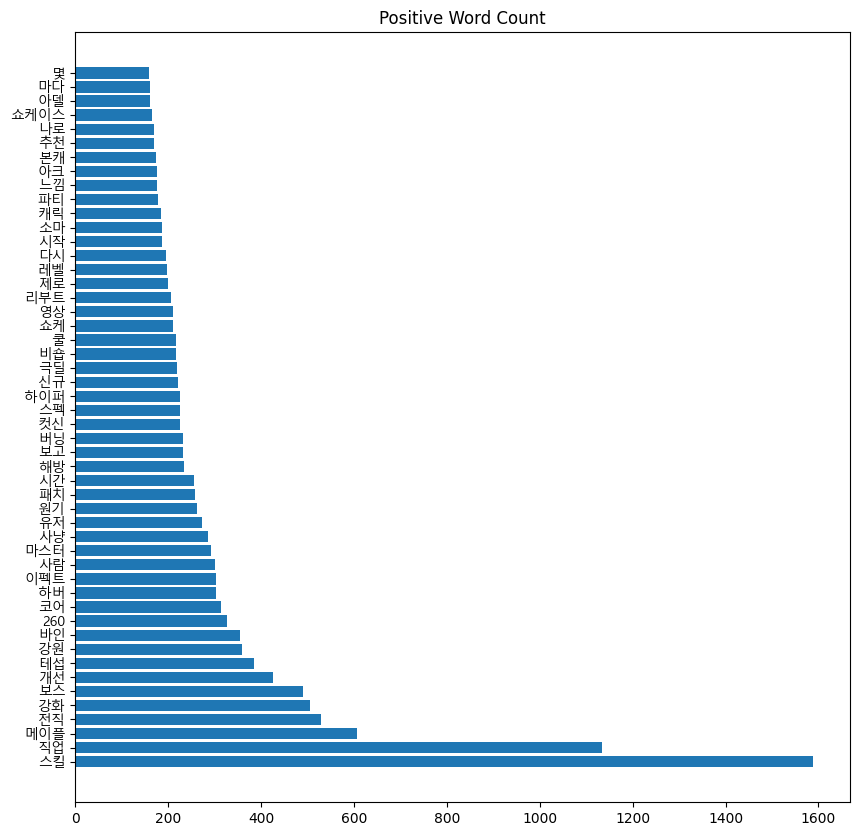

In [34]:
y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(10, 10))
plt.barh(y_pos, top_nouns.values())
plt.title('Positive Word Count')
plt.yticks(y_pos, top_nouns.keys(), fontproperties=fontprop)
plt.show()

In [35]:
!pip install wordcloud

In [36]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./drive/MyDrive/data/malgun.ttf')
wc.generate_from_frequencies(top_nouns)

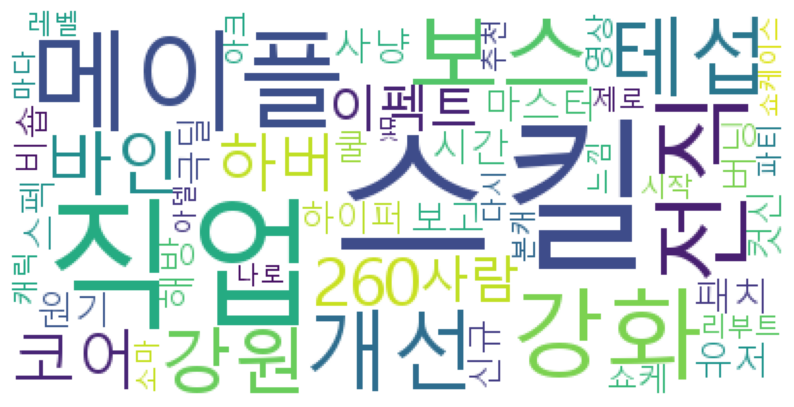

In [37]:
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

### 긍정에서의 최빈 언급 직업

직업 : 패스파인더(패파), 듀얼블레이드(듀블), 썬콜, 불독, 아델, 나이트로드(나로), 아크, 섀도어(섀도), 비숍, 데몬어벤져(데몬), 엔젤릭버스터(엔버, 엔젤릭), 소울마스터(소마), 다크나이트(닼나), 히어로, 바이퍼, 팬텀, 아란, 은월, 윈드브레이커(윈브), 제로, 에반, 캐논슈터(캐슈), 메르세데스(메르), 루미너스(루미), 키네시스(키네), 카데나, 팔라딘, 데몬슬레이어(데슬), 플레임위자드(플임), 제논, 호영, 카이저, 신궁, 스트라이커(스트), 나이트워커(나워), 블래스터(블래), 보우마스터(보마), 배틀메이지(배메), 캡틴, 와일드헌터(와헌), 일리움, 메카닉, 미하일

In [38]:
def count_word_in_list(word_list, target_word):
    return word_list.count(target_word)

In [39]:
jobs = ['패스파인더', '패파', '듀블', '듀얼', '블레이드', '아크메이지', '불독', '아델','나이트', '로드', '나로', '아크', '섀도어', '섀도', '비숍', '데몬', '엔버', '엔젤', '버스터', '소울', '소마', '다크나이트', '닼나', '다크', '나이트', '히어로', '바이퍼', '팬텀', '아란', '은월',
            '윈드', '윈브', '윈드브레이커', '제로', '에반', '슈터', '캐논', '캐슈', '메르세데스', '메세', '메르', '루미너스', '루미', '시스', '카데나', '팔라딘', '슬레이어', '데슬', '플레임', '제논', '호영', '카이저', '신궁', '스트라이커',
            '나이트', '워커', '나워', '블래', '보우', '보마', '배메', '배틀', '캡틴', '헌터', '와일드', '일리', '메카', '미하일', '라라', '칼리', '카인']

In [40]:
for job in jobs:
    count = count_word_in_list(pos_words, job)
    print(f"'{job}'의 개수 : {count}")

'패스파인더'의 개수 : 9
'패파'의 개수 : 45
'듀블'의 개수 : 90
'듀얼'의 개수 : 10
'블레이드'의 개수 : 15
'아크메이지'의 개수 : 8
'불독'의 개수 : 94
'아델'의 개수 : 161
'나이트'의 개수 : 25
'로드'의 개수 : 14
'나로'의 개수 : 170
'아크'의 개수 : 175
'섀도어'의 개수 : 1
'섀도'의 개수 : 137
'비숍'의 개수 : 217
'데몬'의 개수 : 55
'엔버'의 개수 : 152
'엔젤'의 개수 : 26
'버스터'의 개수 : 22
'소울'의 개수 : 19
'소마'의 개수 : 186
'다크나이트'의 개수 : 19
'닼나'의 개수 : 55
'다크'의 개수 : 5
'나이트'의 개수 : 25
'히어로'의 개수 : 149
'바이퍼'의 개수 : 95
'팬텀'의 개수 : 118
'아란'의 개수 : 87
'은월'의 개수 : 101
'윈드'의 개수 : 1
'윈브'의 개수 : 119
'윈드브레이커'의 개수 : 9
'제로'의 개수 : 199
'에반'의 개수 : 91
'슈터'의 개수 : 15
'캐논'의 개수 : 16
'캐슈'의 개수 : 47
'메르세데스'의 개수 : 22
'메세'의 개수 : 4
'메르'의 개수 : 101
'루미너스'의 개수 : 40
'루미'의 개수 : 98
'시스'의 개수 : 50
'카데나'의 개수 : 42
'팔라딘'의 개수 : 81
'슬레이어'의 개수 : 18
'데슬'의 개수 : 70
'플레임'의 개수 : 15
'제논'의 개수 : 65
'호영'의 개수 : 94
'카이저'의 개수 : 100
'신궁'의 개수 : 77
'스트라이커'의 개수 : 21
'나이트'의 개수 : 25
'워커'의 개수 : 13
'나워'의 개수 : 33
'블래'의 개수 : 6
'보우'의 개수 : 18
'보마'의 개수 : 96
'배메'의 개수 : 33
'배틀'의 개수 : 25
'캡틴'의 개수 : 54
'헌터'의 개수 : 16
'와일드'의 개수 : 12
'일리'의 개수 : 19
'메카'의 개수 : 64
'미하일'의 개수 : 75
'라라'

In [41]:
maple_job = ['패스파인더', '듀얼블레이더', '아크메이지(썬,콜)', '아크메이지(불,독)', '아델', '나이트로드', '아크', '섀도어', '비숍', '데몬어벤져', '엔젤릭버스터', '소울마스터', '다크나이트', '히어로', '바이퍼', '팬텀', '아란', '은월', '윈드브레이커', '제로',
                     '에반', '캐논마스터', '메르세데스', '루미너스', '키네시스', '카데나', '팔라딘', '데몬슬레이어', '플레임위자드', '제논', '호영', '카이저', '신궁', '스트라이커', '나이트워커', '블래스터', '보우마스터', '배틀메이지', '캡틴', '와일드헌터',
                     '일리움', '메카닉', '미하일', '라라', '칼리', '카인']
counts = [54, 115, 8, 94, 161, 196, 175, 138, 217, 55, 200, 205, 92, 149, 95, 118, 87, 101, 129, 199,
               91, 78, 127, 138, 50, 42, 81, 98, 15, 65, 94, 100, 77, 21, 53, 6, 114, 58, 54, 12, 19, 64, 75, 69, 69, 90]

In [42]:
pos_maple_job_dict = dict(zip(maple_job, counts))
pos_maple_job_dict = dict(sorted(pos_maple_job_dict.items(), key=lambda x: x[1], reverse=True))
pos_maple_job_dict

{'비숍': 217,
 '소울마스터': 205,
 '엔젤릭버스터': 200,
 '제로': 199,
 '나이트로드': 196,
 '아크': 175,
 '아델': 161,
 '히어로': 149,
 '섀도어': 138,
 '루미너스': 138,
 '윈드브레이커': 129,
 '메르세데스': 127,
 '팬텀': 118,
 '듀얼블레이더': 115,
 '보우마스터': 114,
 '은월': 101,
 '카이저': 100,
 '데몬슬레이어': 98,
 '바이퍼': 95,
 '아크메이지(불,독)': 94,
 '호영': 94,
 '다크나이트': 92,
 '에반': 91,
 '카인': 90,
 '아란': 87,
 '팔라딘': 81,
 '캐논마스터': 78,
 '신궁': 77,
 '미하일': 75,
 '라라': 69,
 '칼리': 69,
 '제논': 65,
 '메카닉': 64,
 '배틀메이지': 58,
 '데몬어벤져': 55,
 '패스파인더': 54,
 '캡틴': 54,
 '나이트워커': 53,
 '키네시스': 50,
 '카데나': 42,
 '스트라이커': 21,
 '일리움': 19,
 '플레임위자드': 15,
 '와일드헌터': 12,
 '아크메이지(썬,콜)': 8,
 '블래스터': 6}

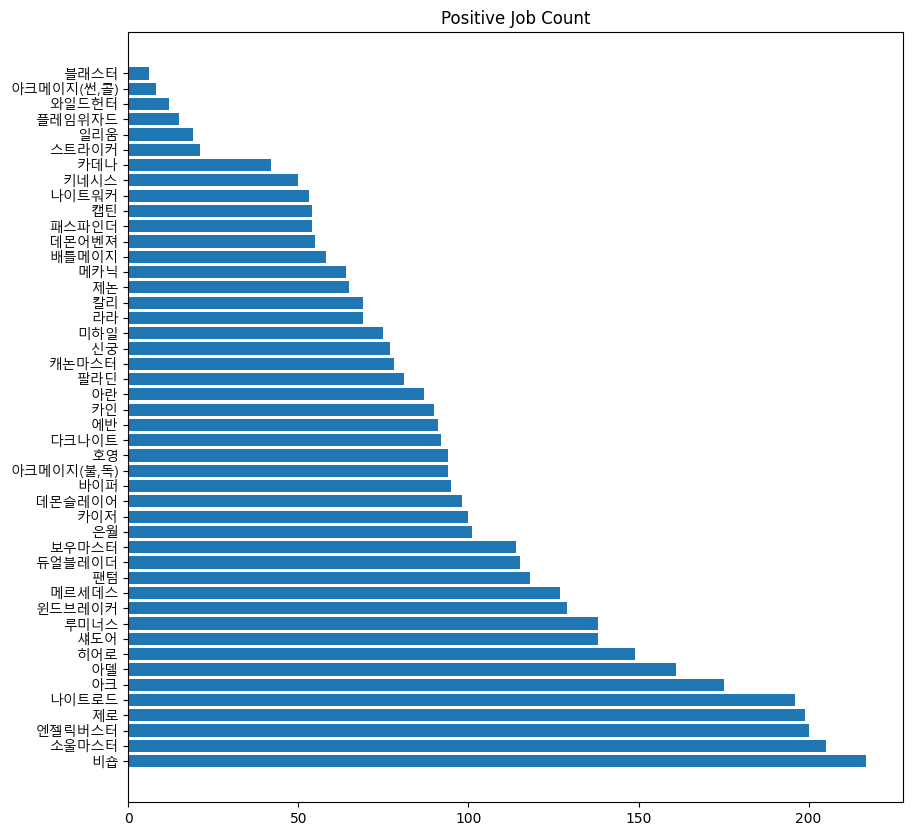

In [43]:
y_pos = np.arange(len(pos_maple_job_dict))

plt.figure(figsize=(10, 10))
plt.barh(y_pos, pos_maple_job_dict.values())
plt.title('Positive Job Count')
plt.yticks(y_pos, pos_maple_job_dict.keys(), fontproperties=fontprop)
plt.show()

## 네번째 분석

### 부정에서의 최빈 단어 top50

In [44]:
neg = df[df['Label'] == '0']
neg

,Date,Reaction,Length,Label,Score,Day
0,2023-06-01 01:02:00,6차 아니면 로드맵 유기하면 안되는거 아니야 간담회까지 열어서 로드맵 보여주겠다고 ...,176,0,99.650,1
1,2023-06-01 02:08:00,6차 왔냐 66 66 6 6 ;;;,19,0,92.741,1
2,2023-06-01 02:59:00,근데 6차나오면 전직업 최종뎀 뻥튀기되서 보스컷 낮아지지않음? 5차때처럼 5차스킬하...,152,0,60.217,1
3,2023-06-01 03:34:00,6차 거의 확정으로보는 분위기 아녓음? 오늘은분위기가 갑자기 다들 회의적이네 냉정해졌어,48,0,68.620,1
5,2023-06-01 04:30:00,6차는 도전목표가 되어야지 뉴비도 즐길 수준인건 반대함 뉴비도 컨텐츠 다 즐겨야한다...,95,0,98.716,1
...,...,...,...,...,...,...
13314,2023-06-30 21:57:00,근데이번에 5차이하 구조개선은 없음? 걍 딱 45차강화랑 6차스킬만 나오는거임??,45,0,93.196,30
13316,2023-06-30 22:07:00,솔직히 제로는 6차 바인드 20초 줘야되는거 아님?? 이색기는 시간의 초월자면서 그...,59,0,99.105,30
13319,2023-06-30 22:23:00,"도원경 개선도 6차 상륙때까지 ""기다려""임? 설마 280지역 나오고나서야 개선은 아니지?",49,0,99.006,30
13322,2023-06-30 22:48:00,메소 생각보다 안오르는데 6차가 고점인가 스카 2500에서 2600에서 머무네 28...,52,0,64.501,30


In [45]:
# 한글과 공백을 제외하고 모두 제거
neg['Reaction'] = neg['Reaction'].str.replace("[^0-9 가-힣]","")
neg['Reaction'].replace('', np.nan, inplace=True)
neg.isnull().sum()

Date        0
Reaction    0
Length      0
Label       0
Score       0
Day         0
dtype: int64

반복하면서 stopwords 업데이트

In [46]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면', '6', '차', '로', '으로', '안', '5', '에서', '기', '2', '때', '것', '있는', '링',
                     '개', '것', '1', '하고', '이번', '진짜', '나', '까지', '더', '적', '지금', '4', '인데', '좀', '근데', '잘', '3', '수', '아', '딜', '차는', '거', '나오면', '그', '중', '정도', '할', '뭐', '차가', '하는', '내', '못', '너무', '이제', '하면', '시드',
                     '드', '같은데', '추가', '함', '랑', '전', '본', '해서', '같음', '주', '리', '저', '하나', '어', '일', '섭', '그냥', '극', '신', '서', '많이', '상', '요', '부터', '님', '라', '보면', '됨', '같은', '있음', '이랑', '제', '난', '니까', '어떻게', '없는', '해도',
                     '있는', '처럼', '다른', '형', '기존', '성', "키", '애', '보다', '차로', '존나', '이렇게', '또', '이라', '왜', '시', '대', '오늘', '한번', '명', '말', '라고', '때문', '일단', '차도', '바로', '같이', '해', '해야', '오리진', '된', '진', '마다', '이나']

In [47]:
neg['Reaction'] = neg['Reaction'].apply(okt.normalize)
neg['Reaction'] = neg['Reaction'].apply(okt.morphs)
neg['Reaction'] = neg['Reaction'].apply(lambda x: [item for item in x if item not in stopwords])

In [48]:
neg_words = []

for word in neg['Reaction']:
    neg_words.extend(word)

In [49]:
from collections import Counter

nouns_counter = Counter(neg_words)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'스킬': 2857,
 '직업': 2001,
 '보스': 994,
 '생각': 987,
 '강화': 899,
 '개선': 860,
 '사냥': 642,
 '쿨': 615,
 '유저': 599,
 '메이플': 571,
 '전직': 561,
 '아님': 553,
 '문제': 497,
 '패치': 494,
 '마스터': 469,
 '바인': 459,
 '리부트': 450,
 '파티': 437,
 '사람': 427,
 '코어': 417,
 '테섭': 415,
 '걍': 412,
 '60초': 406,
 '시간': 404,
 '리마': 372,
 '스펙': 370,
 '극딜': 367,
 '이펙트': 363,
 '구조': 355,
 '새끼': 341,
 '신규': 335,
 '공용': 335,
 '컷신': 334,
 '력기': 333,
 '이유': 329,
 '병신': 312,
 '없음': 310,
 '이런': 307,
 '운영': 294,
 '260': 292,
 '느낌': 280,
 '솔직히': 273,
 '사용': 272,
 '보고': 268,
 '퍼뎀': 267,
 '야': 256,
 '시발': 251,
 '삭제': 239,
 '컷씬': 235,
 '경험치': 232}

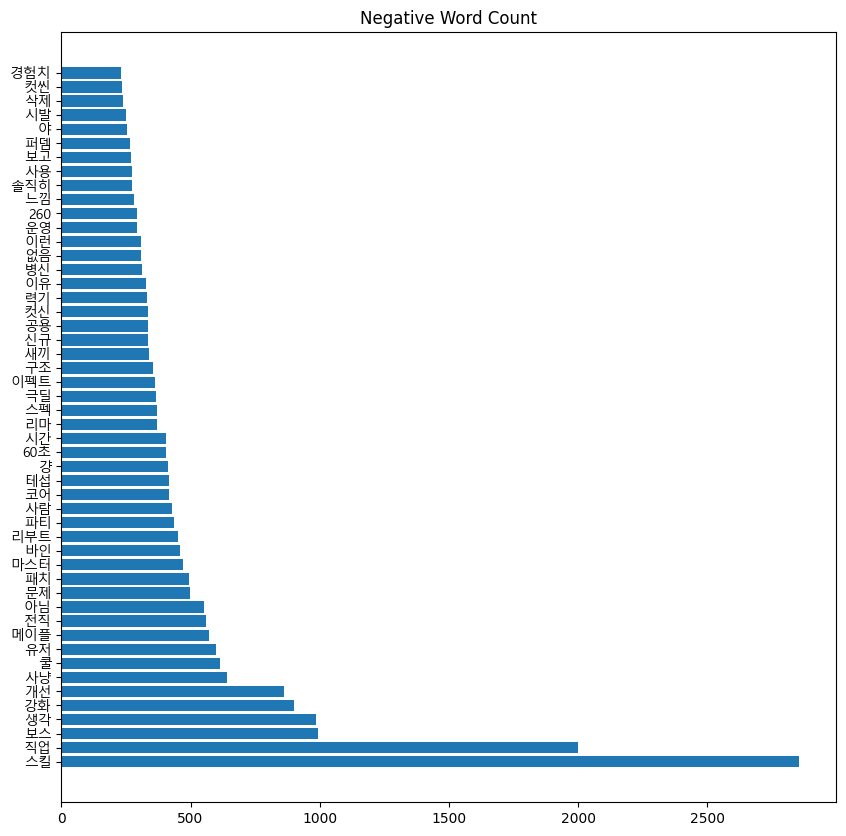

In [50]:
y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(10, 10))
plt.barh(y_pos, top_nouns.values())
plt.title('Negative Word Count')
plt.yticks(y_pos, top_nouns.keys(), fontproperties=fontprop)
plt.show()

In [51]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black', font_path='./drive/MyDrive/data/malgun.ttf')
wc.generate_from_frequencies(top_nouns)

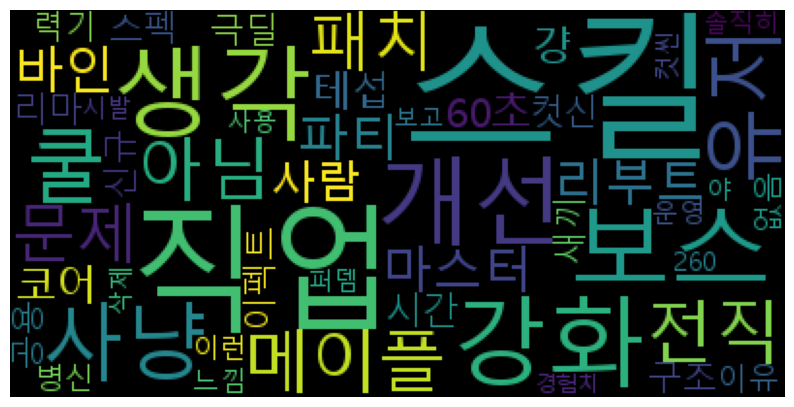

In [52]:
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

### 부정에서의 최빈 언급 직업

In [53]:
jobs = ['패스', '패파', '듀블', '듀얼', '블레이드', '아크메이지', '불독', '아델','나이트', '로드', '나로', '아크', '섀도', '비숍', '데몬', '엔버', '엔젤', '버스터', '소울', '소마', '다크', '닼나', '히어로', '바이퍼', '팬텀', '아란', '은월', '윈드', '윈브', '브레이커', '제로',
                     '에반', '슈터', '캐논', '캐슈', '캐논슈터', '메르세데스', '메세', '메르', '루미너스', '루미', '시스', '카데나', '팔라딘', '데슬', '플레임', '제논', '호영', '카이저', '신궁', '스트라이커', '스트', '워커', '나워', '블래', '보우', '보마', '배메', '배틀', '캡틴', '헌터',
                     '일리움', '일리', '메카', '메카닉', '미하일', '라라', '칼리', '카인']

In [54]:
for job in jobs:
    count = count_word_in_list(neg_words, job)
    print(f"'{job}'의 개수 : {count}")

'패스'의 개수 : 7
'패파'의 개수 : 35
'듀블'의 개수 : 50
'듀얼'의 개수 : 5
'블레이드'의 개수 : 5
'아크메이지'의 개수 : 1
'불독'의 개수 : 55
'아델'의 개수 : 150
'나이트'의 개수 : 9
'로드'의 개수 : 5
'나로'의 개수 : 217
'아크'의 개수 : 199
'섀도'의 개수 : 44
'비숍'의 개수 : 134
'데몬'의 개수 : 28
'엔버'의 개수 : 131
'엔젤'의 개수 : 13
'버스터'의 개수 : 11
'소울'의 개수 : 9
'소마'의 개수 : 93
'다크'의 개수 : 10
'닼나'의 개수 : 33
'히어로'의 개수 : 79
'바이퍼'의 개수 : 75
'팬텀'의 개수 : 213
'아란'의 개수 : 89
'은월'의 개수 : 91
'윈드'의 개수 : 2
'윈브'의 개수 : 180
'브레이커'의 개수 : 1
'제로'의 개수 : 143
'에반'의 개수 : 94
'슈터'의 개수 : 6
'캐논'의 개수 : 7
'캐슈'의 개수 : 24
'캐논슈터'의 개수 : 1
'메르세데스'의 개수 : 7
'메세'의 개수 : 2
'메르'의 개수 : 109
'루미너스'의 개수 : 23
'루미'의 개수 : 81
'시스'의 개수 : 9
'카데나'의 개수 : 31
'팔라딘'의 개수 : 78
'데슬'의 개수 : 70
'플레임'의 개수 : 4
'제논'의 개수 : 30
'호영'의 개수 : 39
'카이저'의 개수 : 76
'신궁'의 개수 : 38
'스트라이커'의 개수 : 11
'스트'의 개수 : 0
'워커'의 개수 : 4
'나워'의 개수 : 50
'블래'의 개수 : 2
'보우'의 개수 : 11
'보마'의 개수 : 144
'배메'의 개수 : 14
'배틀'의 개수 : 5
'캡틴'의 개수 : 48
'헌터'의 개수 : 5
'일리움'의 개수 : 1
'일리'의 개수 : 9
'메카'의 개수 : 68
'메카닉'의 개수 : 0
'미하일'의 개수 : 23
'라라'의 개수 : 64
'칼리'의 개수 : 114
'카인'의 개수 : 40


In [55]:
maple_job = ['패스파인더', '듀얼블레이더', '아크메이지(썬,콜)', '아크메이지(불,독)', '아델', '나이트로드', '아크', '섀도어', '비숍', '데몬어벤져', '엔젤릭버스터', '소울마스터', '다크나이트', '히어로', '바이퍼', '팬텀', '아란', '은월', '윈드브레이커', '제로',
                     '에반', '캐논마스터', '메르세데스', '루미너스', '키네시스', '카데나', '팔라딘', '데몬슬레이어', '플레임위자드', '제논', '호영', '카이저', '신궁', '스트라이커', '나이트워커', '블래스터', '보우마스터', '배틀메이지', '캡틴', '와일드헌터',
                     '일리움', '메카닉', '미하일', '라라', '칼리', '카인']
counts = [42, 60, 1, 55, 150, 231, 199, 44, 134, 28, 155, 102, 43, 79, 75, 213, 89, 91, 182, 143,
               94, 38, 118, 104, 9, 31, 78, 70, 4, 30, 39, 76, 38, 11, 54, 2, 155, 19, 48, 5, 10, 68, 23, 64, 114, 40]

In [56]:
neg_maple_job_dict = dict(zip(maple_job, counts))
neg_maple_job_dict = dict(sorted(neg_maple_job_dict.items(), key=lambda x: x[1], reverse=True))
neg_maple_job_dict

{'나이트로드': 231,
 '팬텀': 213,
 '아크': 199,
 '윈드브레이커': 182,
 '엔젤릭버스터': 155,
 '보우마스터': 155,
 '아델': 150,
 '제로': 143,
 '비숍': 134,
 '메르세데스': 118,
 '칼리': 114,
 '루미너스': 104,
 '소울마스터': 102,
 '에반': 94,
 '은월': 91,
 '아란': 89,
 '히어로': 79,
 '팔라딘': 78,
 '카이저': 76,
 '바이퍼': 75,
 '데몬슬레이어': 70,
 '메카닉': 68,
 '라라': 64,
 '듀얼블레이더': 60,
 '아크메이지(불,독)': 55,
 '나이트워커': 54,
 '캡틴': 48,
 '섀도어': 44,
 '다크나이트': 43,
 '패스파인더': 42,
 '카인': 40,
 '호영': 39,
 '캐논마스터': 38,
 '신궁': 38,
 '카데나': 31,
 '제논': 30,
 '데몬어벤져': 28,
 '미하일': 23,
 '배틀메이지': 19,
 '스트라이커': 11,
 '일리움': 10,
 '키네시스': 9,
 '와일드헌터': 5,
 '플레임위자드': 4,
 '블래스터': 2,
 '아크메이지(썬,콜)': 1}

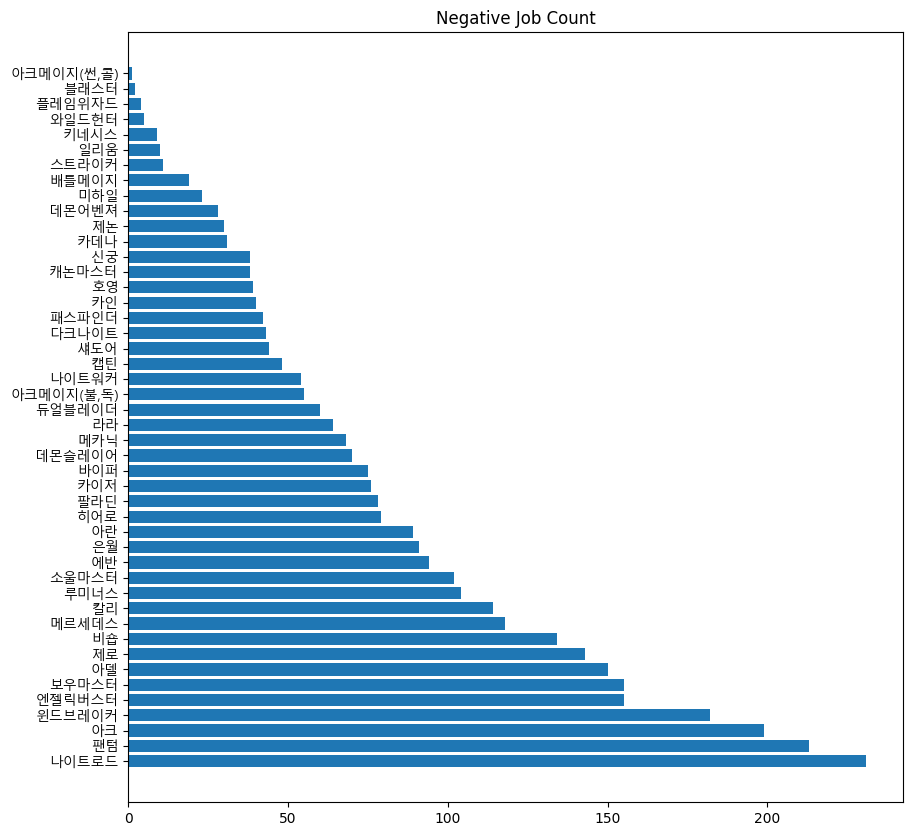

In [58]:
y_neg = np.arange(len(neg_maple_job_dict))

plt.figure(figsize=(10, 10))
plt.barh(y_neg, neg_maple_job_dict.values())
plt.title('Negative Job Count')
plt.yticks(y_neg, neg_maple_job_dict.keys(), fontproperties=fontprop)
plt.show()

### 상관관계 확인

전체 인구수 즉, 인기가 많은 직업일수록 긍정/부정 반응이 많은것인가에 대해 상관관계를 확인했습니다.

전체 직업별 인구수는 maple.gg 직업 통계 참조

메이플 월드의 전체 인구수는 https://www.inven.co.kr/board/maple/2304/33566 참조

In [59]:
data = [
    ("아델", 8.62), ("소울마스터", 5.57), ("듀얼블레이더", 4.76),
    ("바이퍼", 4.46), ("나이트로드", 4.32), ("윈드브레이커", 3.91),
    ("칼리", 3.88), ("히어로", 3.79), ("섀도어", 3.78), ("아크메이지(썬,콜)", 3.52),
    ("비숍", 3.52), ("패스파인더", 3.24), ("호영", 2.73), ("팔라딘", 2.69),
    ("은월", 2.51), ("아크메이지(불,독)", 2.47), ("아크", 2.33), ("라라", 2.33),
    ("다크나이트", 2.27), ('나이트워커', 2.19), ("메르세데스", 1.93), ("데몬어벤져", 1.82),
    ("카인", 1.75), ("엔젤릭버스터", 1.72), ("팬텀", 1.48), ("신궁", 1.25), ("카이저", 1.22),
    ("캐논마스터", 1.12), ('키네시스', 1.1), ('보우마스터', 1.08), ("루미너스", 1.07),
    ("플레임위자드", 1.), ("스트라이커", 0.96), ("제로", 0.96), ("메카닉", 0.95), ("캡틴", 0.93),
    ("아란", 0.91), ("데몬슬레이어", 0.9), ("미하일", 0.85), ("에반", 0.79), ("배틀메이지", 0.76),
    ("카데나", 0.71), ("블래스터", 0.52), ("와일드헌터", 0.49), ("제논", 0.44), ("일리움", 0.40),
    ("기타", 0.03)
]

total_population = 308250

for job, percentage in data:
    population = round(total_population * (percentage / 100))
    print(f"{job} 직업의 인구수: {population}")

아델 직업의 인구수: 26571
소울마스터 직업의 인구수: 17170
듀얼블레이더 직업의 인구수: 14673
바이퍼 직업의 인구수: 13748
나이트로드 직업의 인구수: 13316
윈드브레이커 직업의 인구수: 12053
칼리 직업의 인구수: 11960
히어로 직업의 인구수: 11683
섀도어 직업의 인구수: 11652
아크메이지(썬,콜) 직업의 인구수: 10850
비숍 직업의 인구수: 10850
패스파인더 직업의 인구수: 9987
호영 직업의 인구수: 8415
팔라딘 직업의 인구수: 8292
은월 직업의 인구수: 7737
아크메이지(불,독) 직업의 인구수: 7614
아크 직업의 인구수: 7182
라라 직업의 인구수: 7182
다크나이트 직업의 인구수: 6997
나이트워커 직업의 인구수: 6751
메르세데스 직업의 인구수: 5949
데몬어벤져 직업의 인구수: 5610
카인 직업의 인구수: 5394
엔젤릭버스터 직업의 인구수: 5302
팬텀 직업의 인구수: 4562
신궁 직업의 인구수: 3853
카이저 직업의 인구수: 3761
캐논마스터 직업의 인구수: 3452
키네시스 직업의 인구수: 3391
보우마스터 직업의 인구수: 3329
루미너스 직업의 인구수: 3298
플레임위자드 직업의 인구수: 3082
스트라이커 직업의 인구수: 2959
제로 직업의 인구수: 2959
메카닉 직업의 인구수: 2928
캡틴 직업의 인구수: 2867
아란 직업의 인구수: 2805
데몬슬레이어 직업의 인구수: 2774
미하일 직업의 인구수: 2620
에반 직업의 인구수: 2435
배틀메이지 직업의 인구수: 2343
카데나 직업의 인구수: 2189
블래스터 직업의 인구수: 1603
와일드헌터 직업의 인구수: 1510
제논 직업의 인구수: 1356
일리움 직업의 인구수: 1233
기타 직업의 인구수: 92


In [60]:
job_population = {job: round(total_population * (percentage / 100)) for job, percentage in data}
job_population

{'아델': 26571,
 '소울마스터': 17170,
 '듀얼블레이더': 14673,
 '바이퍼': 13748,
 '나이트로드': 13316,
 '윈드브레이커': 12053,
 '칼리': 11960,
 '히어로': 11683,
 '섀도어': 11652,
 '아크메이지(썬,콜)': 10850,
 '비숍': 10850,
 '패스파인더': 9987,
 '호영': 8415,
 '팔라딘': 8292,
 '은월': 7737,
 '아크메이지(불,독)': 7614,
 '아크': 7182,
 '라라': 7182,
 '다크나이트': 6997,
 '나이트워커': 6751,
 '메르세데스': 5949,
 '데몬어벤져': 5610,
 '카인': 5394,
 '엔젤릭버스터': 5302,
 '팬텀': 4562,
 '신궁': 3853,
 '카이저': 3761,
 '캐논마스터': 3452,
 '키네시스': 3391,
 '보우마스터': 3329,
 '루미너스': 3298,
 '플레임위자드': 3082,
 '스트라이커': 2959,
 '제로': 2959,
 '메카닉': 2928,
 '캡틴': 2867,
 '아란': 2805,
 '데몬슬레이어': 2774,
 '미하일': 2620,
 '에반': 2435,
 '배틀메이지': 2343,
 '카데나': 2189,
 '블래스터': 1603,
 '와일드헌터': 1510,
 '제논': 1356,
 '일리움': 1233,
 '기타': 92}

In [61]:
neg_maple_job_dict

{'나이트로드': 231,
 '팬텀': 213,
 '아크': 199,
 '윈드브레이커': 182,
 '엔젤릭버스터': 155,
 '보우마스터': 155,
 '아델': 150,
 '제로': 143,
 '비숍': 134,
 '메르세데스': 118,
 '칼리': 114,
 '루미너스': 104,
 '소울마스터': 102,
 '에반': 94,
 '은월': 91,
 '아란': 89,
 '히어로': 79,
 '팔라딘': 78,
 '카이저': 76,
 '바이퍼': 75,
 '데몬슬레이어': 70,
 '메카닉': 68,
 '라라': 64,
 '듀얼블레이더': 60,
 '아크메이지(불,독)': 55,
 '나이트워커': 54,
 '캡틴': 48,
 '섀도어': 44,
 '다크나이트': 43,
 '패스파인더': 42,
 '카인': 40,
 '호영': 39,
 '캐논마스터': 38,
 '신궁': 38,
 '카데나': 31,
 '제논': 30,
 '데몬어벤져': 28,
 '미하일': 23,
 '배틀메이지': 19,
 '스트라이커': 11,
 '일리움': 10,
 '키네시스': 9,
 '와일드헌터': 5,
 '플레임위자드': 4,
 '블래스터': 2,
 '아크메이지(썬,콜)': 1}

In [62]:
pos_maple_job_dict

{'비숍': 217,
 '소울마스터': 205,
 '엔젤릭버스터': 200,
 '제로': 199,
 '나이트로드': 196,
 '아크': 175,
 '아델': 161,
 '히어로': 149,
 '섀도어': 138,
 '루미너스': 138,
 '윈드브레이커': 129,
 '메르세데스': 127,
 '팬텀': 118,
 '듀얼블레이더': 115,
 '보우마스터': 114,
 '은월': 101,
 '카이저': 100,
 '데몬슬레이어': 98,
 '바이퍼': 95,
 '아크메이지(불,독)': 94,
 '호영': 94,
 '다크나이트': 92,
 '에반': 91,
 '카인': 90,
 '아란': 87,
 '팔라딘': 81,
 '캐논마스터': 78,
 '신궁': 77,
 '미하일': 75,
 '라라': 69,
 '칼리': 69,
 '제논': 65,
 '메카닉': 64,
 '배틀메이지': 58,
 '데몬어벤져': 55,
 '패스파인더': 54,
 '캡틴': 54,
 '나이트워커': 53,
 '키네시스': 50,
 '카데나': 42,
 '스트라이커': 21,
 '일리움': 19,
 '플레임위자드': 15,
 '와일드헌터': 12,
 '아크메이지(썬,콜)': 8,
 '블래스터': 6}

In [66]:
pos_df = pd.DataFrame.from_dict(pos_maple_job_dict, orient='index', columns=['count in pos'])
neg_df = pd.DataFrame.from_dict(neg_maple_job_dict, orient='index', columns=['count in neg'])
world_df = pd.DataFrame.from_dict(job_population, orient='index', columns=['count in world'])

In [68]:
result_df = pd.concat([pos_df, neg_df, world_df], axis=1)
result_df.T.head()

,비숍,소울마스터,엔젤릭버스터,제로,나이트로드,아크,아델,히어로,섀도어,루미너스,...,나이트워커,키네시스,카데나,스트라이커,일리움,플레임위자드,와일드헌터,"아크메이지(썬,콜)",블래스터,기타
count in pos,217.0,205.0,200.0,199.0,196.0,175.0,161.0,149.0,138.0,138.0,...,53.0,50.0,42.0,21.0,19.0,15.0,12.0,8.0,6.0,NaN
count in neg,134.0,102.0,155.0,143.0,231.0,199.0,150.0,79.0,44.0,104.0,...,54.0,9.0,31.0,11.0,10.0,4.0,5.0,1.0,2.0,NaN
count in world,10850.0,17170.0,5302.0,2959.0,13316.0,7182.0,26571.0,11683.0,11652.0,3298.0,...,6751.0,3391.0,2189.0,2959.0,1233.0,3082.0,1510.0,10850.0,1603.0,92.0


In [69]:
correlation_matrix = result_df.corr()
correlation_matrix

,count in pos,count in neg,count in world
count in pos,1.000000,0.785620,0.481333
count in neg,0.785620,1.000000,0.374773
count in world,0.481333,0.374773,1.000000


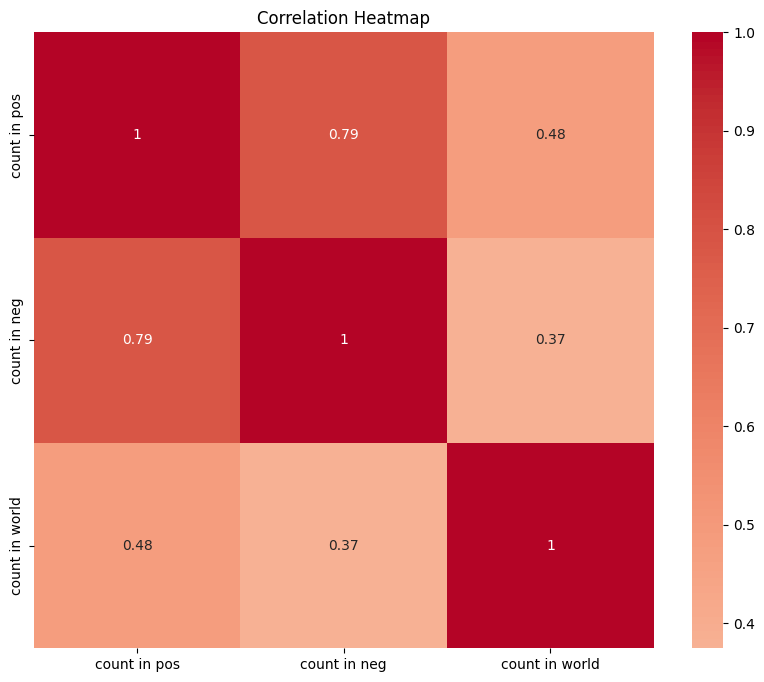

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(result_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

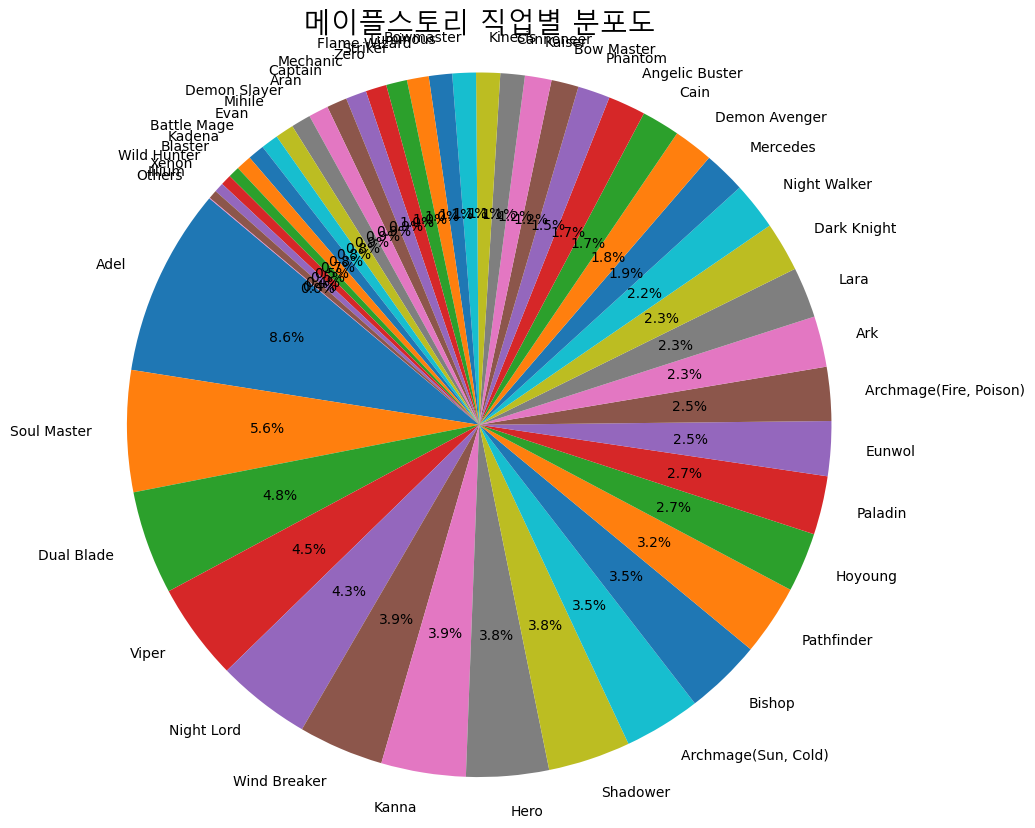

In [74]:
data = [
    ("Adel", 8.62), ("Soul Master", 5.57), ("Dual Blade", 4.76),
    ("Viper", 4.46), ("Night Lord", 4.32), ("Wind Breaker", 3.91),
    ("Kanna", 3.88), ("Hero", 3.79), ("Shadower", 3.78), ("Archmage(Sun, Cold)", 3.52),
    ("Bishop", 3.52), ("Pathfinder", 3.24), ("Hoyoung", 2.73), ("Paladin", 2.69),
    ("Eunwol", 2.51), ("Archmage(Fire, Poison)", 2.47), ("Ark", 2.33), ("Lara", 2.33),
    ("Dark Knight", 2.27), ('Night Walker', 2.19), ("Mercedes", 1.93), ("Demon Avenger", 1.82),
    ("Cain", 1.75), ("Angelic Buster", 1.72), ("Phantom", 1.48), ("Bow Master", 1.25), ("Kaiser", 1.22),
    ("Cannoneer", 1.12), ('Kinesis', 1.1), ('Bowmaster', 1.08), ("Luminous", 1.07),
    ("Flame Wizard", 1.), ("Striker", 0.96), ("Zero", 0.96), ("Mechanic", 0.95), ("Captain", 0.93),
    ("Aran", 0.91), ("Demon Slayer", 0.9), ("Mihile", 0.85), ("Evan", 0.79), ("Battle Mage", 0.76),
    ("Kadena", 0.71), ("Blaster", 0.52), ("Wild Hunter", 0.49), ("Xenon", 0.44), ("Illium", 0.40),
    ("Others", 0.03)
]

labels, sizes = zip(*data)
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('메이플스토리 직업별 분포도', fontproperties=fontprop, size=20)
plt.show()

# 전체 데이터 활용

In [ ]:
total = pd.read_csv('./drive/MyDrive/data/project/maple.csv')
total = total[['Date', 'Reaction']]
total

,Date,Reaction
0,2023-06-01 00:00,아 맞다 금은손 헉
1,2023-06-01 00:00,1살 or 2살 어려진 거 축하
2,2023-06-01 00:00,멍눈은 도대체 언제나오냐 최근에 나온적 있음?
3,2023-06-01 00:00,내일부터 진짜 공부함 일주일전부터 공부시작이지 원래
4,2023-06-01 00:00,왜 졸리지 반나절을 잣는데 우째서
...,...,...
177631,2023-06-30 23:59,메m) 170 달성하신 형님들 꿀팁 알려주십쇼ㅠ 29일 부터 사냥만 죽어라 해서 1...
177632,2023-06-30 23:59,님들 저 자랑할 거 있어여 버닝섭 몬파 상자에서 재획비 먹음!!펫하나 더 살 수 있다!
177633,2023-06-30 23:59,내가 오마이걸팬은 아닌데 오마이걸노래 좋더라 https://youtu.be/xnAY...
177634,2023-06-30 23:59,그냥 육성법 대중적으로 하는 그대로 따라갈까 에반 키우고 있었는데 퀘 깨다가 이거 ...


##다섯번째 분석

하루단위 게시글 count

In [ ]:
total['Date'] = pd.to_datetime(total['Date'])
total['Day'] = total['Date'].dt.day
total

,Date,Reaction,Day
0,2023-06-01 00:00:00,아 맞다 금은손 헉,1
1,2023-06-01 00:00:00,1살 or 2살 어려진 거 축하,1
2,2023-06-01 00:00:00,멍눈은 도대체 언제나오냐 최근에 나온적 있음?,1
3,2023-06-01 00:00:00,내일부터 진짜 공부함 일주일전부터 공부시작이지 원래,1
4,2023-06-01 00:00:00,왜 졸리지 반나절을 잣는데 우째서,1
...,...,...,...
177631,2023-06-30 23:59:00,메m) 170 달성하신 형님들 꿀팁 알려주십쇼ㅠ 29일 부터 사냥만 죽어라 해서 1...,30
177632,2023-06-30 23:59:00,님들 저 자랑할 거 있어여 버닝섭 몬파 상자에서 재획비 먹음!!펫하나 더 살 수 있다!,30
177633,2023-06-30 23:59:00,내가 오마이걸팬은 아닌데 오마이걸노래 좋더라 https://youtu.be/xnAY...,30
177634,2023-06-30 23:59:00,그냥 육성법 대중적으로 하는 그대로 따라갈까 에반 키우고 있었는데 퀘 깨다가 이거 ...,30


In [ ]:
grouped = total.groupby('Day').count()
grouped = grouped['Reaction']
grouped = pd.DataFrame(grouped)
grouped

,Reaction
Day,
1,3507
2,3572
3,3009
4,3584
5,4151
6,4753
7,5351
8,3974
9,4339


In [ ]:
grouped.describe()

,Reaction
count,30.000000
mean,5921.200000
std,2185.796381
min,3009.000000
25%,4434.250000
50%,5516.500000
75%,6847.000000
max,13642.000000


In [ ]:
grouped.sum(axis=0)

Reaction    177636
dtype: int64

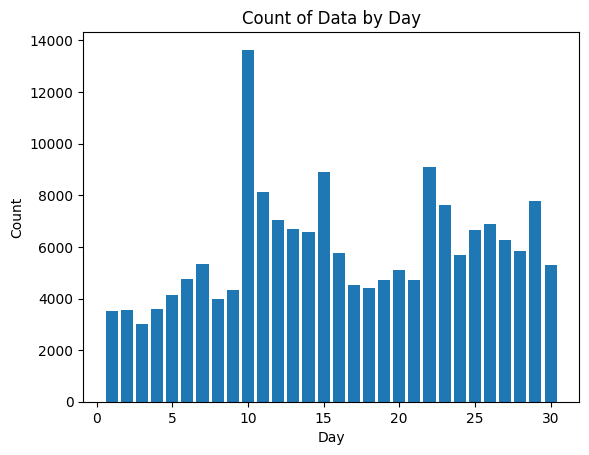

In [ ]:
plt.bar(grouped.index, grouped['Reaction'])
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Count of Data by Day')
plt.show()

In [ ]:
grouped.describe()

,Reaction
count,30.000000
mean,5921.200000
std,2185.796381
min,3009.000000
25%,4434.250000
50%,5516.500000
75%,6847.000000
max,13642.000000


## 여섯번째 분석

유저들의 게시물 게시 시간대

In [ ]:
total

,Date,Reaction,Day
0,2023-06-01 00:00:00,아 맞다 금은손 헉,1
1,2023-06-01 00:00:00,1살 or 2살 어려진 거 축하,1
2,2023-06-01 00:00:00,멍눈은 도대체 언제나오냐 최근에 나온적 있음?,1
3,2023-06-01 00:00:00,내일부터 진짜 공부함 일주일전부터 공부시작이지 원래,1
4,2023-06-01 00:00:00,왜 졸리지 반나절을 잣는데 우째서,1
...,...,...,...
177631,2023-06-30 23:59:00,메m) 170 달성하신 형님들 꿀팁 알려주십쇼ㅠ 29일 부터 사냥만 죽어라 해서 1...,30
177632,2023-06-30 23:59:00,님들 저 자랑할 거 있어여 버닝섭 몬파 상자에서 재획비 먹음!!펫하나 더 살 수 있다!,30
177633,2023-06-30 23:59:00,내가 오마이걸팬은 아닌데 오마이걸노래 좋더라 https://youtu.be/xnAY...,30
177634,2023-06-30 23:59:00,그냥 육성법 대중적으로 하는 그대로 따라갈까 에반 키우고 있었는데 퀘 깨다가 이거 ...,30


In [ ]:
total['H'] = total['Date'].dt.hour
grouped_h = total.groupby('H').count()
grouped_h = grouped_h['Reaction']
grouped_h = pd.DataFrame(grouped_h)
grouped_h

,Reaction
H,
0,7761
1,7177
2,5792
3,3933
4,2636
5,1761
6,1730
7,2818
8,4435


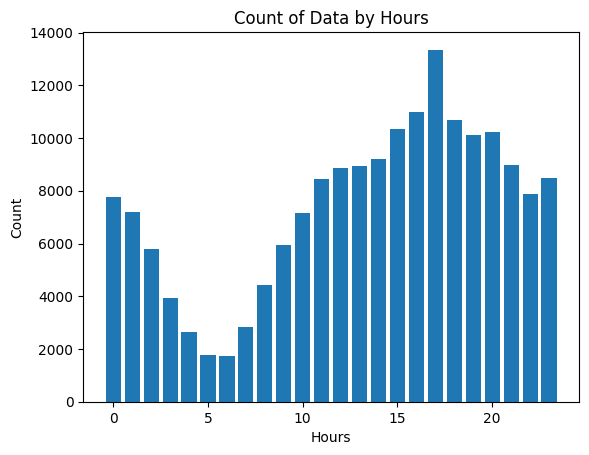

In [ ]:
plt.bar(grouped_h.index, grouped_h['Reaction'])
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title('Count of Data by Hours')
plt.show()